In [1]:
import pandas as pd
import warnings
def fxn():
    warnings.warn("deprecated", DeprecationWarning)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [2]:
deaths_df = pd.read_excel('CovidDeaths.xlsx')
vaccinations_df = pd.read_excel('CovidVaccinations.xlsx')

## Performing initial data cleaning 

In [3]:
deaths_df['continent'].fillna('Unknown', inplace=True)
vaccinations_df['continent'].fillna('Unknown', inplace=True)

In [4]:
numerical_cols = deaths_df.select_dtypes(include=['float64']).columns
for col in numerical_cols:
    deaths_df[col].fillna(deaths_df[col].mean(), inplace=True)
    #vaccinations_df[col].fillna(vaccinations_df[col].mean(), inplace=True)

In [5]:
numerical_cols1 = vaccinations_df.select_dtypes(include=['float64']).columns
for col in numerical_cols1:
    vaccinations_df[col].fillna(vaccinations_df[col].mean(), inplace=True)

In [6]:
#For some other unique columns using forward filling instead 
deaths_df.fillna(method='ffill', inplace=True)
vaccinations_df.fillna(method='ffill', inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14492\3176299717.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  deaths_df.fillna(method='ffill', inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14492\3176299717.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  vaccinations_df.fillna(method='ffill', inplace=True)


---

## Data Merging using Outer Join 

In [7]:
combined_df = pd.merge(deaths_df, vaccinations_df, on=['iso_code', 'location', 'date'], how='outer')

In [8]:
combined_df.head()

,iso_code,continent_x,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,gdp_per_capita_y,extreme_poverty_y,cardiovasc_death_rate_y,diabetes_prevalence_y,female_smokers_y,male_smokers_y,handwashing_facilities_y,hospital_beds_per_thousand_y,life_expectancy_y,human_development_index_y
0,AFG,Asia,Afghanistan,2020-02-24,38928341.0,1.0,1.0,5780.94148,23004.088941,139.052606,...,1803.987,13.348729,597.029,9.59,10.520272,32.65697,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,38928341.0,1.0,0.0,5780.94148,23004.088941,139.052606,...,1803.987,13.348729,597.029,9.59,10.520272,32.65697,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,38928341.0,1.0,0.0,5780.94148,23004.088941,139.052606,...,1803.987,13.348729,597.029,9.59,10.520272,32.65697,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,38928341.0,1.0,0.0,5780.94148,23004.088941,139.052606,...,1803.987,13.348729,597.029,9.59,10.520272,32.65697,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,38928341.0,1.0,0.0,5780.94148,23004.088941,139.052606,...,1803.987,13.348729,597.029,9.59,10.520272,32.65697,37.746,0.5,64.83,0.511


---

## Exploratory Data Analysis

In [9]:
print(combined_df.describe())

                                date    population   total_cases  \
count                          85171  8.517100e+04  8.517100e+04   
mean   2020-10-02 18:15:29.978513920  1.284213e+08  8.250083e+05   
min              2020-01-01 00:00:00  8.090000e+02  1.000000e+00   
25%              2020-06-18 00:00:00  2.540916e+06  1.004000e+03   
50%              2020-10-05 00:00:00  1.013918e+07  1.168900e+04   
75%              2021-01-21 00:00:00  3.774216e+07  1.322245e+05   
max              2021-04-30 00:00:00  7.794799e+09  1.513995e+08   
std                              NaN  6.882104e+08  5.635209e+06   

           new_cases  new_cases_smoothed  total_deaths    new_deaths  \
count   85171.000000        85171.000000  8.517100e+04  85171.000000   
mean     5808.325352         5780.941480  2.300409e+04    139.052606   
min    -74347.000000        -6223.000000  1.000000e+00  -1918.000000   
25%         2.000000            7.714000  6.200000e+01      0.000000   
50%        80.000000       

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

## After the merge choosing only the columns we need and removing duplicates

In [11]:
existing_columns = combined_df.columns
columns_to_keep = []
for col in existing_columns:
    if col.endswith('_x'):
        columns_to_keep.append(col)
    elif not col.endswith('_y') and col + '_y' not in existing_columns:
        columns_to_keep.append(col)

In [12]:
clean_df = combined_df[columns_to_keep].copy()
# Remove the '_x' suffix from column names
clean_df.columns = [col[:-2] if col.endswith('_x') else col for col in clean_df.columns]
clean_df['date'] = pd.to_datetime(clean_df['date'])

In [13]:
clean_df.columns

Index(['iso_code', 'continent', 'location', 'date', 'population',
       'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths',
       'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccin

In [15]:
# Descriptive statistics of new dataframe
print(clean_df.describe())

                                date    population   total_cases  \
count                          85171  8.517100e+04  8.517100e+04   
mean   2020-10-02 18:15:29.978513920  1.284213e+08  8.250083e+05   
min              2020-01-01 00:00:00  8.090000e+02  1.000000e+00   
25%              2020-06-18 00:00:00  2.540916e+06  1.004000e+03   
50%              2020-10-05 00:00:00  1.013918e+07  1.168900e+04   
75%              2021-01-21 00:00:00  3.774216e+07  1.322245e+05   
max              2021-04-30 00:00:00  7.794799e+09  1.513995e+08   
std                              NaN  6.882104e+08  5.635209e+06   

           new_cases  new_cases_smoothed  total_deaths    new_deaths  \
count   85171.000000        85171.000000  8.517100e+04  85171.000000   
mean     5808.325352         5780.941480  2.300409e+04    139.052606   
min    -74347.000000        -6223.000000  1.000000e+00  -1918.000000   
25%         2.000000            7.714000  6.200000e+01      0.000000   
50%        80.000000       

## Performing a Time Series Analysis

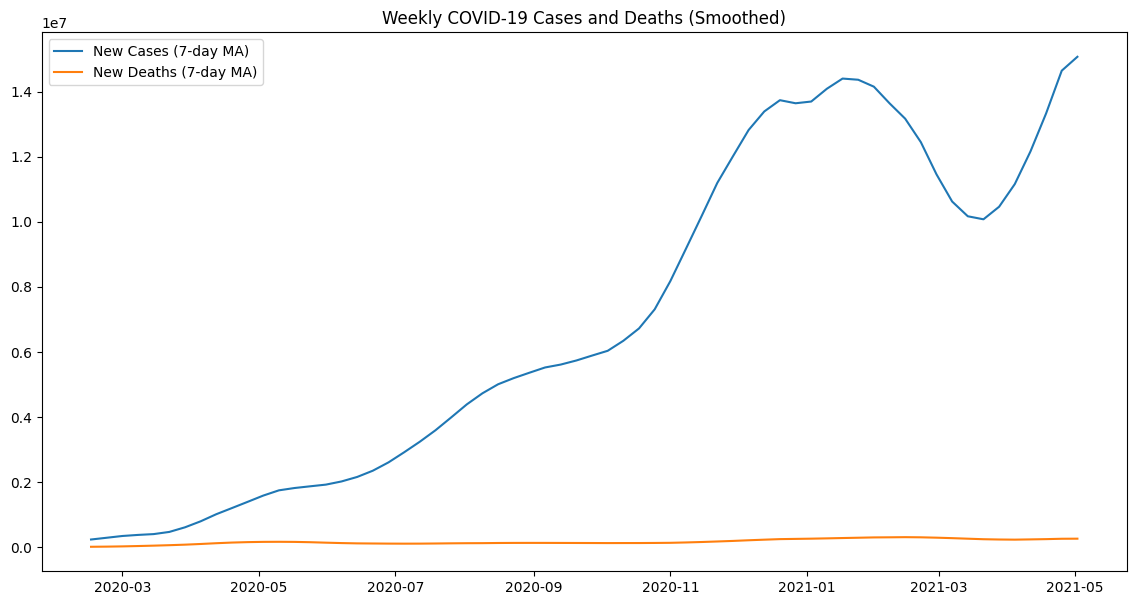

In [16]:
# Set the date as the index
clean_df.set_index('date', inplace=True)

# Resample data weekly
weekly_data = clean_df.resample('W').sum()

# Calculate a 7-day rolling average for cases and deaths
weekly_data['new_cases_smoothed'] = weekly_data['new_cases'].rolling(window=7).mean()
weekly_data['new_deaths_smoothed'] = weekly_data['new_deaths'].rolling(window=7).mean()

plt.figure(figsize=(14, 7))
plt.plot(weekly_data.index, weekly_data['new_cases_smoothed'], label='New Cases (7-day MA)')
plt.plot(weekly_data.index, weekly_data['new_deaths_smoothed'], label='New Deaths (7-day MA)')
plt.legend()
plt.title('Weekly COVID-19 Cases and Deaths (Smoothed)')
plt.show()

## Distribution Plots

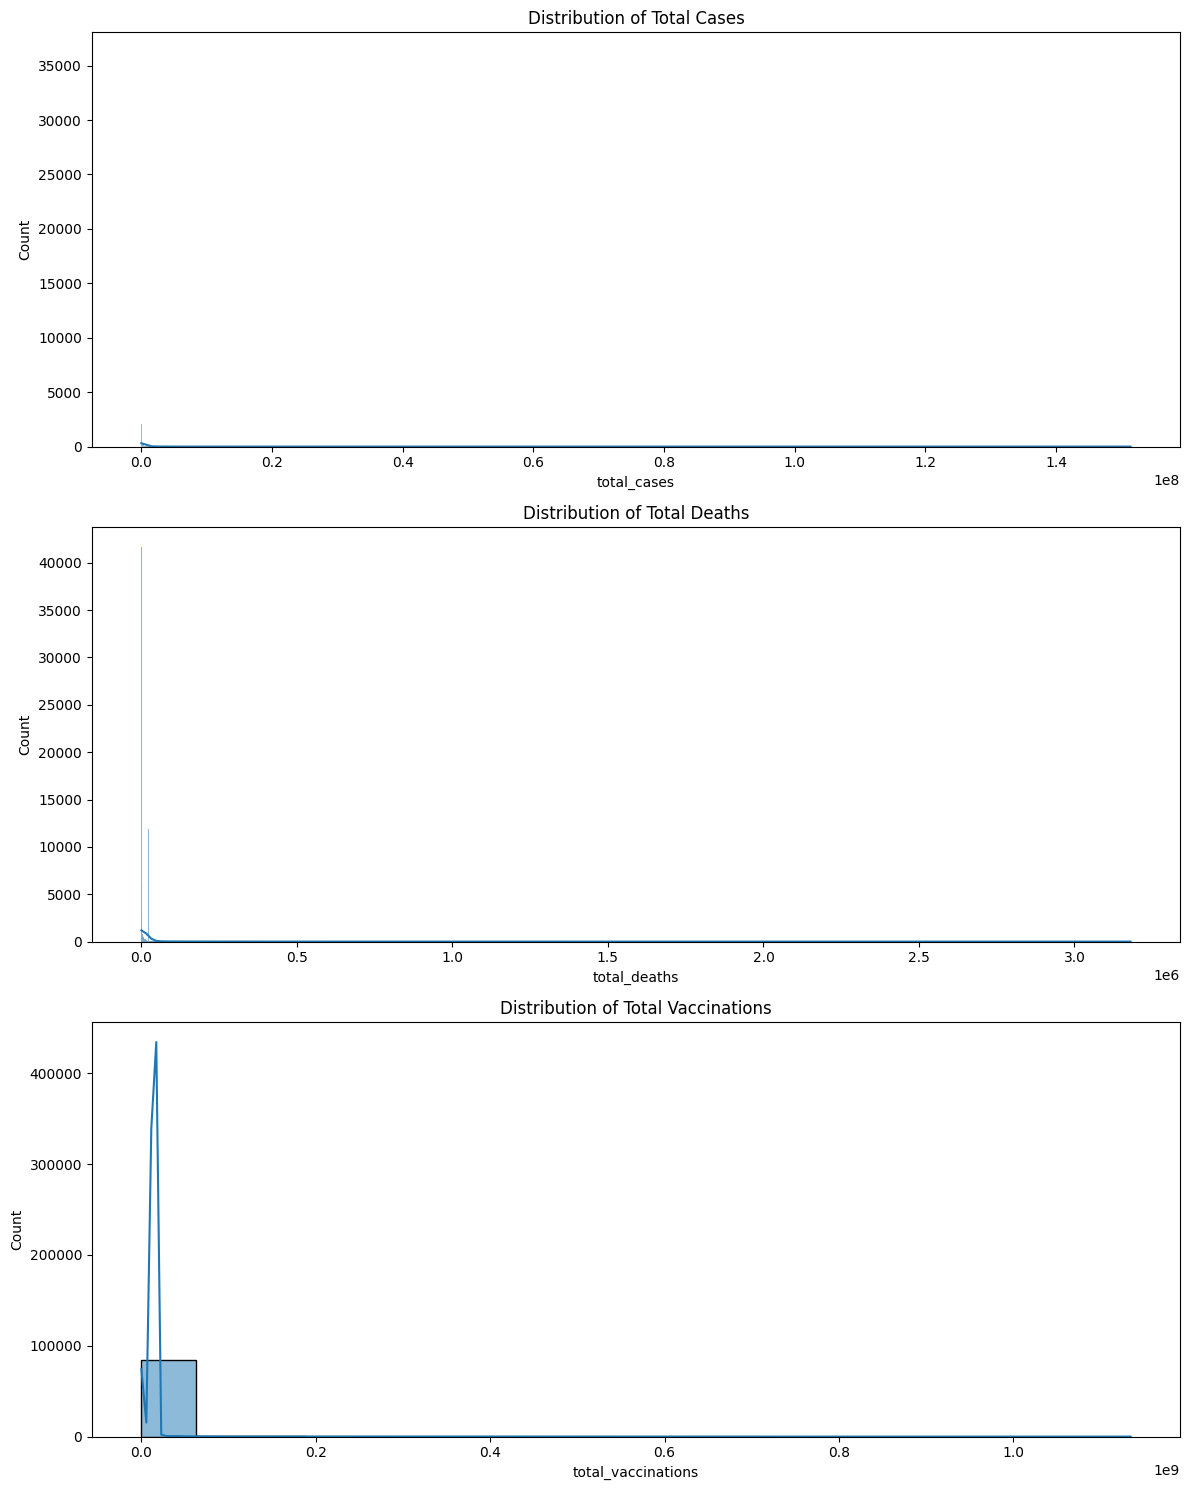

In [17]:
fig, axes = plt.subplots(3, 1, figsize=(12, 15))
sns.histplot(clean_df['total_cases'].dropna(), kde=True, ax=axes[0])
axes[0].set_title('Distribution of Total Cases')
sns.histplot(clean_df['total_deaths'].dropna(), kde=True, ax=axes[1])
axes[1].set_title('Distribution of Total Deaths')
sns.histplot(clean_df['total_vaccinations'].dropna(), kde=True, ax=axes[2])
axes[2].set_title('Distribution of Total Vaccinations')
plt.tight_layout()
plt.show()

## Correlation Heatmaps

In [19]:
import numpy as np

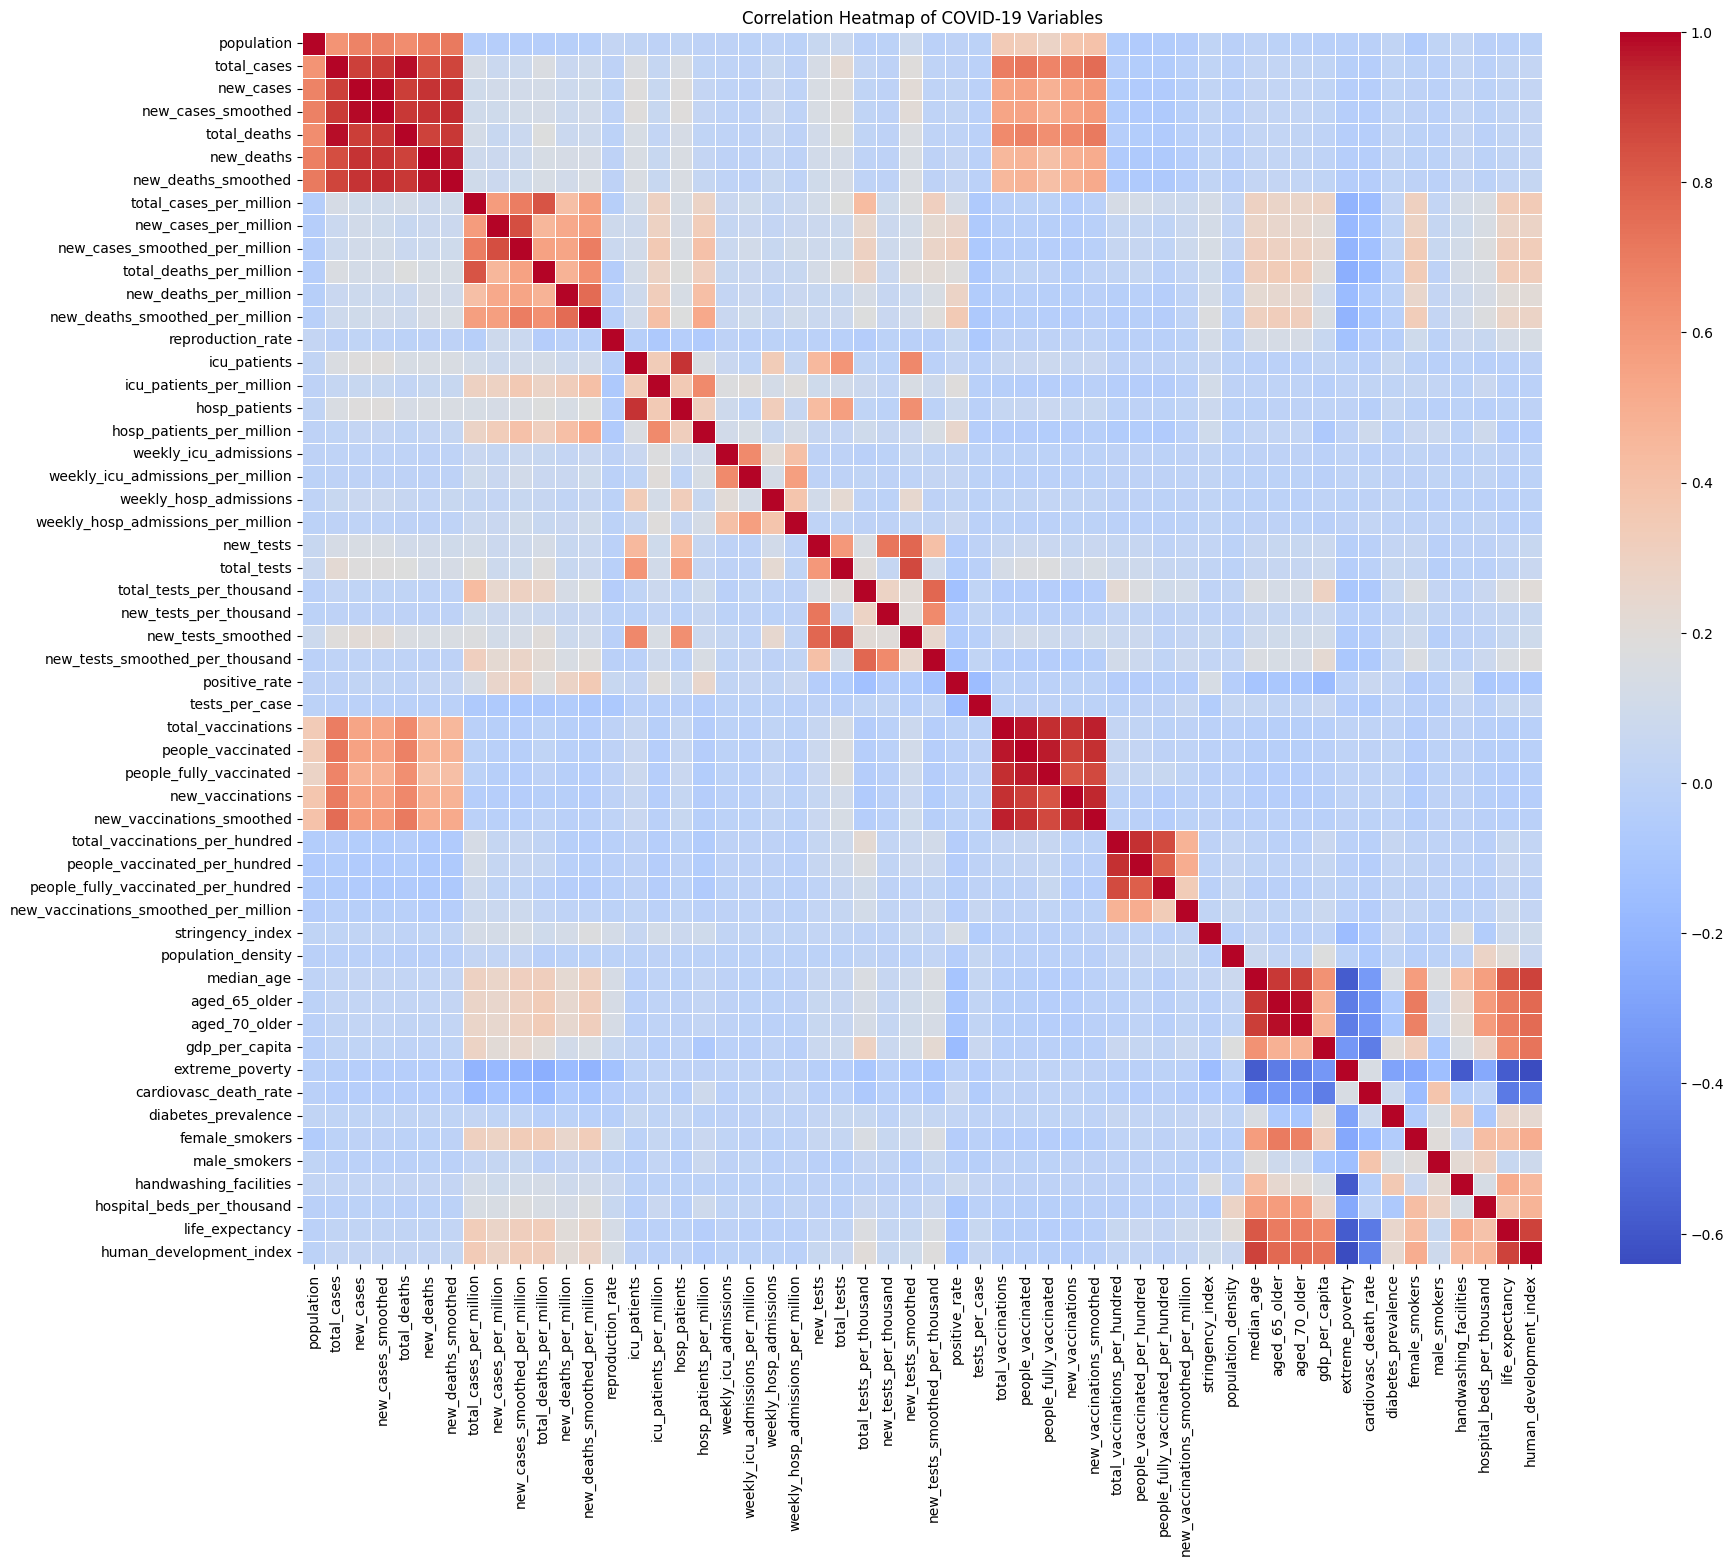

In [20]:
numeric_cols = clean_df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(20, 16))
sns.heatmap(clean_df[numeric_cols].corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of COVID-19 Variables')
plt.show()